c:\Users\hoang\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


[2024/06/29 13:07:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\hoang/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\hoang/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_te

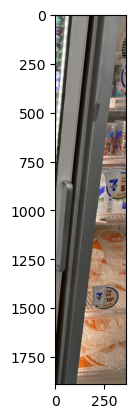

[2024/06/29 13:07:09] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.5003576278686523
[2024/06/29 13:07:10] ppocr DEBUG: rec_res num  : 2, elapsed : 0.360370397567749
Detected OCR result for class 'tu_lanh': [[[[[256.0, 1403.0], [291.0, 1403.0], [291.0, 1444.0], [256.0, 1444.0]], ('TUI', 0.529408872127533)], [[[258.0, 1444.0], [297.0, 1444.0], [297.0, 1468.0], [258.0, 1468.0]], ('10', 0.9963230490684509)]]]


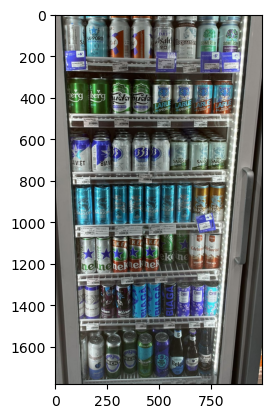

[2024/06/29 13:07:11] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.734630823135376
[2024/06/29 13:07:12] ppocr DEBUG: rec_res num  : 5, elapsed : 0.767115592956543
Detected OCR result for class 'tu_lanh': [[[[[75.0, 380.0], [134.0, 380.0], [134.0, 406.0], [75.0, 406.0]], ('erg', 0.9510540962219238)], [[[170.0, 384.0], [216.0, 384.0], [216.0, 404.0], [170.0, 404.0]], ('ver', 0.8125643134117126)], [[[90.0, 698.0], [142.0, 704.0], [138.0, 734.0], [87.0, 727.0]], ('AVIET', 0.9821775555610657)], [[[743.0, 1128.0], [781.0, 1128.0], [781.0, 1141.0], [743.0, 1141.0]], ('weis', 0.8396952152252197)], [[[174.0, 1651.0], [214.0, 1651.0], [214.0, 1664.0], [174.0, 1664.0]], ('Deoar', 0.6703804731369019)]]]


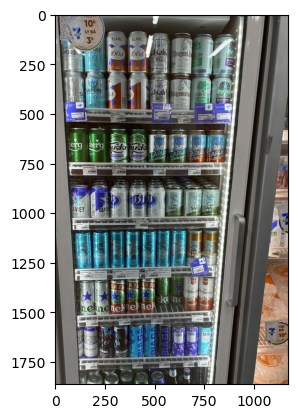

[2024/06/29 13:07:14] ppocr DEBUG: dt_boxes num : 13, elapsed : 1.3931317329406738
[2024/06/29 13:07:16] ppocr DEBUG: rec_res num  : 13, elapsed : 2.183619976043701
Detected OCR result for class 'tu_lanh': [[[[[151.0, 0.0], [201.0, 0.0], [201.0, 14.0], [151.0, 14.0]], ('UIDA', 0.864358127117157)], [[[143.0, 25.0], [209.0, 16.0], [216.0, 64.0], [150.0, 74.0]], ('10k', 0.9884045124053955)], [[[149.0, 70.0], [209.0, 70.0], [209.0, 107.0], [149.0, 107.0]], ('LYDA', 0.9940125942230225)], [[[158.0, 109.0], [199.0, 109.0], [199.0, 146.0], [158.0, 146.0]], ('3k', 0.9899682402610779)], [[[278.0, 111.0], [344.0, 111.0], [344.0, 138.0], [278.0, 138.0]], ('BLANC', 0.9920112490653992)], [[[380.0, 114.0], [444.0, 114.0], [444.0, 136.0], [380.0, 136.0]], ('BLANC', 0.9919818043708801)], [[[280.0, 176.0], [348.0, 181.0], [345.0, 218.0], [277.0, 213.0]], ('1664', 0.9977432489395142)], [[[384.0, 184.0], [448.0, 184.0], [448.0, 217.0], [384.0, 217.0]], ('1664', 0.9901737570762634)], [[[707.0, 400.0], [767

In [2]:
from ultralytics import YOLO
from paddleocr import PaddleOCR
import cv2
from unidecode import unidecode
import matplotlib.pyplot as plt

def initialize_paddleocr():
    return PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=False)

def detect_objects(image_path, detector):
    image = cv2.imread(image_path)
    results = detector(image_path)
    return image, results[0].boxes

def detect_text_in_boxes(image, boxes, paddleocr, class_names):
    texts = []
    for obj in boxes:
        xyxy = obj.xyxy.squeeze().tolist()
        cls = int(obj.cls.squeeze().tolist())  # Class index
        class_name = class_names[cls]  # Class name
        x1, y1, x2, y2 = map(int, xyxy)
        advertise_img = image[y1: y2, x1: x2].copy()
        plt.imshow(advertise_img)
        plt.show()
        # Detect text
        result = paddleocr.ocr(advertise_img, cls=False, det=True)
        print(f"Detected OCR result for class '{class_name}': {result}")  # Print OCR result for debugging
        if result and len(result) > 0:
            for line in result:
                if line:
                    for part in line:
                        if part:
                            line_text = part[1][0]
                            processed_text = unidecode(line_text.replace(" ", "").lower())
                            texts.append((processed_text, class_name))
    return texts

def find_matching_labels(pred, labels):
    unique_word = []

    for txt, class_name in pred:
        w = txt.lower().replace(" ", "")
        if w == "bia":
            continue

        unique_word.append((w, class_name))

    unique_word = list(set(unique_word))
    print(unique_word)
    # unique_word.remove("bia")

    res = {label: [] for label in labels}
    for l in labels:
        for w, class_name in unique_word:
            if l in w or w in l:
                res[l].append(class_name) 
    return res

def main(image_path, text_labels):
    advertise_detector = YOLO(r"C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\weights\v8m_beer_advertise\best.pt")
    paddle_ocr = initialize_paddleocr()
    
    # Get class names from YOLO model
    class_names = advertise_detector.names

    image, boxes = detect_objects(image_path, advertise_detector)
    texts = detect_text_in_boxes(image, boxes, paddle_ocr, class_names)
    matching_labels = find_matching_labels(texts, text_labels)
    
    # Format the output to match the required structure
    formatted_output = {label.capitalize().replace("_", ""): matching_labels[label] for label in text_labels}
    print(formatted_output)

if __name__ == "__main__":
    image_path = r"C:\Users\hoang\OneDrive\Desktop\test_hackcmc\7.jpg"  # Provide the actual image path

    text_labels = ['heineken', 'tiger', 'larue', 'biaviet', 'bivina', 'edelweiss', 'strongbow', 'saigon', '333', 'huda']

    main(image_path, text_labels)
